In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


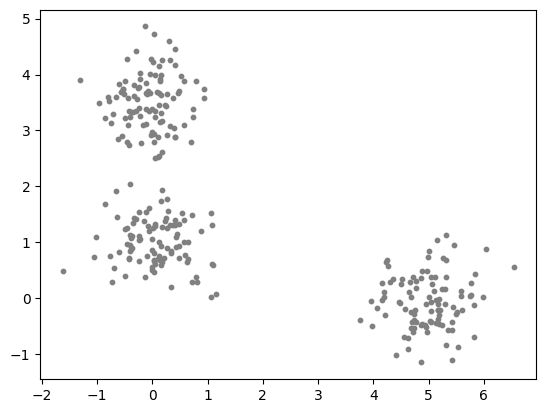

In [90]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=(0, 3.5), scale=0.5, size=(100, 2)),
    np.random.normal(loc=(0, 1), scale=0.5, size=(100, 2)),
    np.random.normal(loc=(5, 0), scale=0.5, size=(100, 2))
])

plt.scatter(X[:, 0], X[:, 1], s=10, color='gray')
plt.show()

In [91]:
inertias_kmeans = []
inertias_kmeans_pp = []

K = range(1, 11)

for k in K:
    # Обычный K-Means (random init)
    km = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
    km.fit(X)
    inertias_kmeans.append(km.inertia_)

    # K-Means++ (умная инициализация)
    km_pp = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km_pp.fit(X)
    inertias_kmeans_pp.append(km_pp.inertia_)

In [94]:
from kneed import KneeLocator

knee = KneeLocator(K, inertias_kmeans_pp, curve='convex', direction='decreasing')

k = knee.knee
print(f"Оптимальный k = {k}")

Оптимальный k = 3


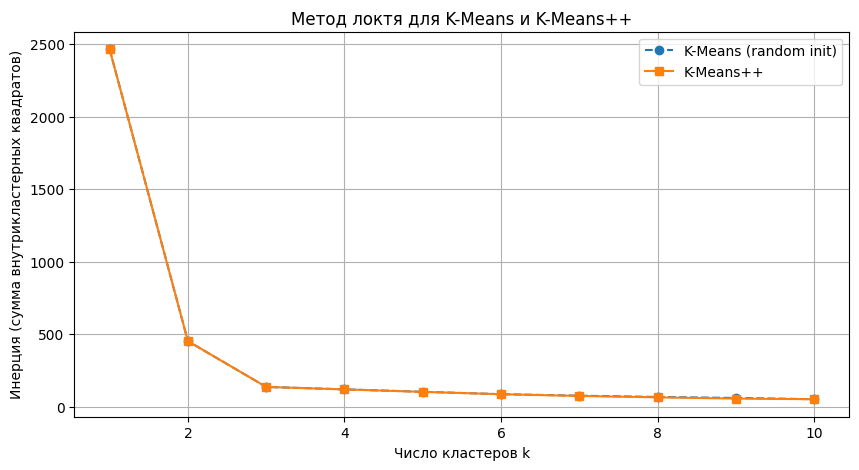

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(K, inertias_kmeans, 'o--', label='K-Means (random init)')
plt.plot(K, inertias_kmeans_pp, 's-', label='K-Means++')
plt.xlabel('Число кластеров k')
plt.ylabel('Инерция (сумма внутрикластерных квадратов)')
plt.title('Метод локтя для K-Means и K-Means++')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
kmeans.fit(X)

kmeans_pp = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans_pp.fit(X)

KMeans(n_clusters=np.int64(3), n_init=10, random_state=42)

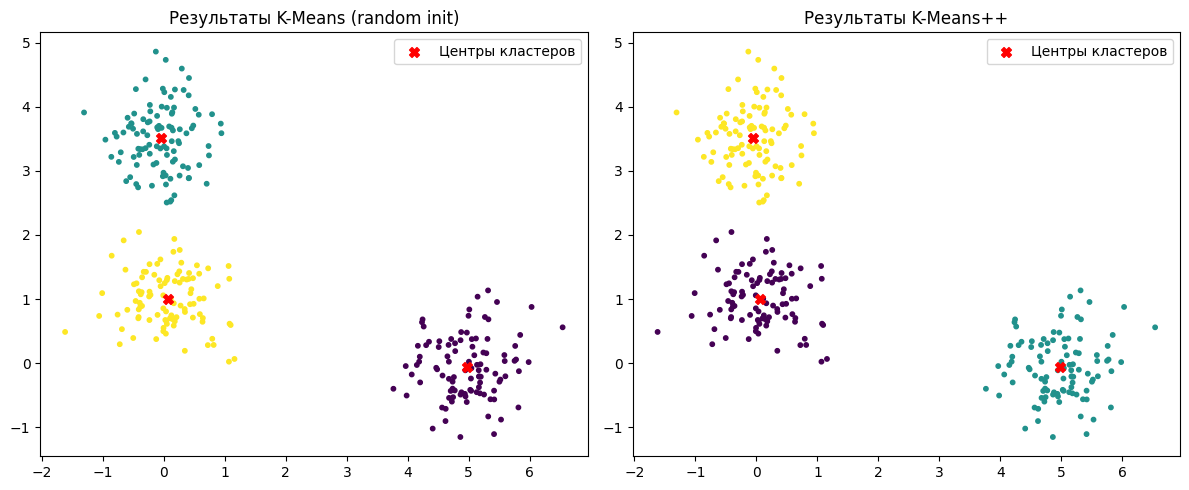

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=10, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', marker='X', label='Центры кластеров')
plt.title('Результаты K-Means (random init)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_pp.labels_, s=10, cmap='viridis')
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], s=50, c='red', marker='X', label='Центры кластеров')
plt.title('Результаты K-Means++')
plt.legend()

plt.tight_layout()
plt.show()